In [33]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import solve
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
#from scipy.special import binom, comb


In [4]:
X = [0,1]
Y = [0,2]

A = np.array([[1,X[0],X[0]**2,X[0]**3],
               [1,X[1],X[1]**2,X[1]**3],
               [0,1,2*X[0],3*X[0]**2],
               [0,1,2*X[1],3*X[1]**2]])

Vx = np.linspace(X[0], X[1], 100)

@interact(alpha0=(-20,20,1),alpha1=(-20,20,1),y0=(-5,5,0.5))
def g(alpha0,alpha1,y0):
    b=np.array([y0,Y[1],alpha0,alpha1])
    Sol = solve(A, b)
    plt.plot(X,[y0,Y[1]],marker='*',markersize=20.)
    def P(x): return Sol[0] + Sol[1]*x + Sol[2]*x**2 + Sol[3]*x**3
    plt.plot(Vx,P(Vx), "-r",linewidth=4.5)
    plt.axis('equal')

interactive(children=(IntSlider(value=0, description='alpha0', max=20, min=-20), IntSlider(value=0, descriptio…

In [7]:
Mat0 = np.zeros((8,8))
Mat0[0,2:4] = [1,2]
print(Mat0)

[[0. 0. 1. 2. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


/var/folders/gq/1q03jlln191gy3065wx3q0j80000gn/T/ipykernel_30259/1681256240.py:14: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "*" (-> marker='*'). The keyword argument will take precedence.
  plt.plot(X,Y,"*",marker='*',markersize=20.)


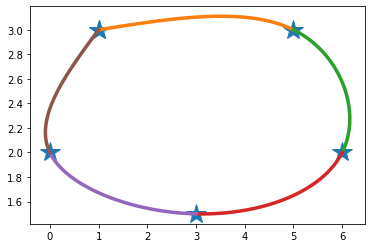

In [26]:
X = [-2, 0, 1, 2, 4, 5]
Y = [ 0, 1, -1, 3, -2, 7]

X = [1.5, 0, 2, 4, 3, 4]
Y = [ 4, 3, 0, 1, -1, 1]

#X = [-2, -1, 0, 1, 2, 3, 4, 5]
#Y = [0.1, 0.2, 0.5, 1, 0.5, 0.2, 0.1, 0.0588]

X = [1,5,6,3,0,1]
Y = [3,3,2,1.5,2,3]

Nb=len(X)-1
plt.plot(X,Y,"*",marker='*',markersize=20.)

t = np.linspace(0,1,Nb+1)
Mat0 = np.zeros((8*Nb,8*Nb))
b = np.zeros(8*Nb)

Mat0[0,0:4] = [1,t[0],t[0]**2,t[0]**3]
Mat0[1,4:8] = [1,t[0],t[0]**2,t[0]**3]
Mat0[2,0:4] = [0,0,2,6*t[0]]  
Mat0[3,4:8] = [0,0,2,6*t[0]]  
b[0:4] = [X[0],Y[0],0,0]

for i in range(1,Nb):
    b[8*i-4:8*i+4] = [X[i],Y[i],X[i],Y[i],0,0,0,0]
    Mat0[8*i-4,8*(i-1)+0:8*(i-1)+4] = [1,t[i],t[i]**2,t[i]**3]  
    Mat0[8*i-3,8*(i-1)+4:8*(i-1)+8] = [1,t[i],t[i]**2,t[i]**3]
    Mat0[8*i-2,8*(i-1)+8:8*(i-1)+12] = [1,t[i],t[i]**2,t[i]**3]  
    Mat0[8*i-1,8*(i-1)+12:8*(i-1)+16] = [1,t[i],t[i]**2,t[i]**3]
    Mat0[8*i+0,8*(i-1)+0:8*(i-1)+4] = [0,1,2*t[i],3*t[i]**2]    
    Mat0[8*i+0,8*(i-1)+8:8*(i-1)+12] = [0,-1,-2*t[i],-3*t[i]**2]  
    Mat0[8*i+1,8*(i-1)+4:8*(i-1)+8] = [0,1,2*t[i],3*t[i]**2]    
    Mat0[8*i+1,8*(i-1)+12:8*(i-1)+16] = [0,-1,-2*t[i],-3*t[i]**2]  
    Mat0[8*i+2,8*(i-1)+0:8*(i-1)+4] = [0,0,2,6*t[i]]   
    Mat0[8*i+2,8*(i-1)+8:8*(i-1)+12] = [0,0,-2,-6*t[i]]
    Mat0[8*i+3,8*(i-1)+4:8*(i-1)+8] = [0,0,2,6*t[i]]    
    Mat0[8*i+3,8*(i-1)+12:8*(i-1)+16] = [0,0,-2,-6*t[i]]  
    

Mat0[8*Nb-4,8*Nb-8:8*Nb-4] = [1,t[Nb],t[Nb]**2,t[Nb]**3]  
Mat0[8*Nb-3,8*Nb-4:8*Nb] = [1,t[Nb],t[Nb]**2,t[Nb]**3]  
Mat0[8*Nb-2,8*Nb-8:8*Nb - 4] = [0,0,2,6*t[Nb]]  
Mat0[8*Nb-1,8*Nb-4:8*Nb] = [0,0,2,6*t[Nb]]  
b[8*Nb-4:8*Nb] = [X[Nb],Y[Nb],0,0]


Sol = solve(Mat0,b)

for i in range(0,Nb):
    def S(x): return [Sol[8*i+0] + Sol[8*i+1]*x + Sol[8*i+2]*x**2 + Sol[8*i+3]*x**3,Sol[8*i+4] + Sol[8*i+5]*x + Sol[8*i+6]*x**2 + Sol[8*i+7]*x**3]
    Vx = np.linspace(t[i],t[i+1],100)
    Gamma = S(Vx)
    plt.plot(Gamma[0],Gamma[1],linewidth=3.5)



In [31]:
np.math.factorial(100)

93326215443944152681699238856266700490715968264381621468592963895217599993229915608941463976156518286253697920827223758251185210916864000000000000000000000000

In [ ]:
# transpose() =W inverse array